# 數水果的問題 The fruit-counting problem
寫程式是模仿你解決問題的邏輯，讓電腦幫你重複做，大量的做。因此，重要的是你解決問題的邏輯。這是個很好的例子，教你怎麼計算一堆物品中，各有幾個。相關範例有：
* 全班有這麼多人，我想算算每個科系有多少人，好知道系所比例安排專題。
* 你被當好人跑腿，幫全班買飲料，結果一票人買了很多種飲料，只好一杯一杯畫正字。
* 計算某一篇文章裡面，每個字出現幾次（字頻）；依照0~10、10~20依此類推計算學生的成績分布。

## 問題定義

考慮一個狀況，有一個跟一座山一樣多的水果，不知道有幾種水果，也不知道有幾顆，你必須要數出各種水果有幾顆，你會怎麼數？

**Solution**: 
* 若你今天在用Excel處理的話，會使用`COUNTIF`函式，作法如下[Excel skills: How do I get the distinct/uniq](https://paper.dropbox.com/doc/Excel-skills--AMhtEb1RwJRKglJS17HxOonIAQ-oFgGCjW9W1m7UXBsdq6UG)
* 如果你是用R來處理的話，那就會是`count(vec)`。

# Programming the fruit-counting problem



### Progammable thinking
先想想若你在數水果實際上你是怎麼數？Ans. 一顆一顆數。

那你怎麼記住哪一種水果有幾顆？Ans. 拿出一張紙，看到一種沒看過的水果，就新增一個「對應」，將水果名稱對應到0，然後在對應的欄位數值遞增一。若已經看過該水果，那就直接找到那個欄位遞增一即可。

### Elaborated thinking
1. 先拿出一張紙做對應表，上面一行要寫水果名，下面一行為他所對應到的水果數量
2. 把水果排成一列準備一個一個數
3. 對在該列中的每顆水果
    * 如果我沒看過他
        * 就在對應表記下該水果，登記該水果為1顆。
    * 若我有看過他
        * 就把對應表上的那個水果所對應到的格子下面的數字加1。

### Translating in English
1. build a look-up table to record each fruit and number of the fruit(calls it dictionary), naming as `fruit_count`
2. keep all fruits in a list named `fruit_list`
3. for each `fruit` in `fruit_list`: 
    * If the fruit does not appear in `fruit_count`
        * Create a mapping in `fruit_count` to map the `fruit` name to 1
    * else
        * increase the mapped value of the `fruit` name in `fruit_count`

# Convert it to python

In [1]:
# Try to type the above code here
fruit_count = {} # dictionary, key to value pairs

fruit_list = ['apple', 'apple', 'banana', 'apple', 'banana', 'grape', 'banana', 'apple'] # A list of fruit

for fruit in fruit_list:
    if fruit not in fruit_count:
        fruit_count[fruit] = 1
    else:
        fruit_count[fruit] += 1  
print(fruit_count)
fruit_count
# print(fruit_count)
# fruit_count

{'apple': 4, 'banana': 3, 'grape': 1}


{'apple': 4, 'banana': 3, 'grape': 1}

* Assignment
`variable = value`
* Assigning an empty dictionary to a vriable
`fruit_count = {}`
* Assigning an list containing value to a variable
`fruit_list = ['a', 'b', 'c', 'a', 'd', 'a', 'w', 'b']`
* var[] Brackes are used to access a list or a dictionry
`fruit_list[1]`
`fruit_count["a"]`
* a = a + 1 is a typical incrementer 遞增運算
`fruit_count[fruit] = fruit_count[fruit] + 1`
* list is ordered `fruit_list[2]`
* dictionary is unordered `fruit_count["b"]`

# Counting Word frequency: A document as your "fruits"
* Now we want to count the occurrence of words in a document. Let treat each word as a distinct fruit. So you must seperate a document (or a sentence) into a list of words. 
* We want to use wikipedia sentences to demonstrate how counting can help us to understand the wording of text.
* Before importing and using the wikipedia package, using `pip install wikipedia` to install it in your computer.

In [2]:
import wikipedia 
import string
string_a  = wikipedia.summary("Big_data", sentences = 10)
type(string_a)
string_a
# string_a = "In 2004, Obama received national attention during his campaign to represent Illinois in the United States Senate with his victory in the March Democratic Party primary, his keynote address at the Democratic National Convention in July, and his election to the Senate in November. He began his presidential campaign in 2007 and, after a close primary campaign against Hillary Rodham Clinton in 2008, he won sufficient delegates in the Democratic Party primaries to receive the presidential nomination. He then defeated Republican nominee John McCain in the general election, and was inaugurated as president on January 20, 2009. Nine months after his inauguration, Obama was named the 2009 Nobel Peace Prize laureate"

'Big data is a term used to refer to the study and applications of data sets that are too complex for traditional data-processing application software to adequately deal with. Big data challenges include capturing data, data storage, data analysis, search, sharing, transfer, visualization, querying, updating, information privacy and data source. Big data was originally associated with three key concepts: volume, variety, and velocity. Other concepts later attributed with big data are veracity (i.e., how much noise is in the data)  and value.\nModern usage of the term "big data" tends to refer to the use of predictive analytics, user behavior analytics, or certain other advanced data analytics methods that extract value from data, and seldom to a particular size of data set. "There is little doubt that the quantities of data now available are indeed large, but that’s not the most relevant characteristic of this new data ecosystem."\nAnalysis of data sets can find new correlations to "sp

## text preprocessing

In [7]:
print(type(string.punctuation))
# astring = astring.translate(None, string.punctuation) for python 2.x
translator = str.maketrans('','',string.punctuation)
string_a = string_a.translate(translator)
string_a = string_a.lower()

words = string_a.split()
print(type(words))
words[:10]

<class 'str'>
<class 'list'>


['big', 'data', 'is', 'a', 'term', 'used', 'to', 'refer', 'to', 'the']

In [17]:
word_freq = {}
for w in words:
    if w not in word_freq: # dictionary key-value initilization
        word_freq[w] = 0
    word_freq[w] += 1
len(word_freq)

199

## Plot histogram of word frequency

(array([154.,  29.,   7.,   2.,   2.,   0.,   0.,   0.,   2.,   0.,   0.,
          2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 1.  ,  1.95,  2.9 ,  3.85,  4.8 ,  5.75,  6.7 ,  7.65,  8.6 ,
         9.55, 10.5 , 11.45, 12.4 , 13.35, 14.3 , 15.25, 16.2 , 17.15,
        18.1 , 19.05, 20.  ]),
 <a list of 20 Patch objects>)

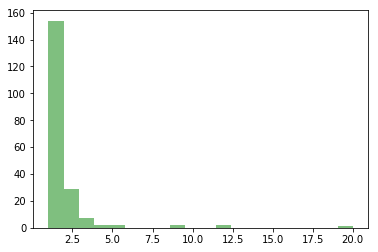

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(word_freq.values(), facecolor='green', alpha=0.5, bins=20)

## More: A shortest version to count word frequency

In [6]:
word_freq = {k:words.count(k) for k in set(words)}

## More:Sorting all pairs of key and value

In [15]:
import operator
sorted_x = sorted(word_freq.items(), 
                  key=operator.itemgetter(1), 
                  reverse=True)

for k in sorted_x[:6]:
    print(k)

('data', 20)
('and', 12)
('of', 12)
('to', 9)
('the', 9)
('big', 5)


# Dictionary: Print out all pair of data by for-loop

In [16]:
print(fruit_count)
print(fruit_count.keys())
print(fruit_count.values())
print(fruit_count.items())

NameError: name 'fruit_count' is not defined

In [19]:
for key in fruit_count:
    print(key, fruit_count[key])

grape 1
apple 4
banana 3


# Shorter versions

### Shorter v.1 Using list.count(key) to count the frequency of something

In [2]:
fruit_count = {} # dictionary, key to value pairs

fruit_list = ['apple', 'apple', 'banana', 'apple', 'banana', 'grape', 'banana', 'apple'] # A list of fruit

for fruit in fruit_list:
    if fruit not in fruit_count:
        fruit_count[fruit] = fruit_list.count(fruit)
print(fruit_count)
fruit_count

{'apple': 4, 'banana': 3, 'grape': 1}


{'apple': 4, 'banana': 3, 'grape': 1}

### Shorter v.2 Using set(fruit_list) to gaurantee unique value in the list

In [9]:
fruit_count = {} # dictionary, key to value pairs
fruit_list = ['apple', 'apple', 'banana', 'apple', 'banana', 'grape', 'banana', 'apple'] # A list of fruit

for fruit in set(fruit_list):
    fruit_count[fruit] = fruit_list.count(fruit)
print(fruit_count)
fruit_count

{'grape': 1, 'apple': 4, 'banana': 3}


{'grape': 1, 'apple': 4, 'banana': 3}

### Shorter v.3 Magic power of python
* Writing in comprehension style
`{k:fruit_list.count(k) for k in set(fruit_list)}`

In [12]:
fruit_count = {k:fruit_list.count(k) for k in set(fruit_list)}
print(fruit_count)

{'grape': 1, 'apple': 4, 'banana': 3}


# Sort the data by value

In [21]:
sorted_keys = sorted(fruit_count, key=fruit_count.get, reverse=True)
print(sorted_keys)

['apple', 'banana', 'grape']


In [22]:
for key in sorted_keys:
    print(key, fruit_count[key])

apple 4
banana 3
grape 1


# Counting grading distribution

In [38]:
import random
grades  =  [random.randint(35, 100) for i in range(0, 75)]
len(grades)
# grades

75

In [40]:
grade_dict = {'F':0, "C":0, "B":0, "A":0}
for g in grades:
    if 100 >= g >= 80:
        grade_dict["A"] += 1
    elif 79 >= g >= 72:
        grade_dict["B"] += 1
    elif 71 >= g >= 60:
        grade_dict["C"] += 1
    else:
        grade_dict["F"] += 1
print(grade_dict)

{'F': 27, 'C': 12, 'B': 12, 'A': 24}


# ANS: Convert to Python
You can copy the following code to your code area. But I recommend that you can type it line by line.
```
    fruit_count = {}
    fruit_list = ['a', 'b', 'c', 'a', 'd', 'a', 'w', 'b']
    for fruit in fruit_list:
      if fruit not in fruit_count:
        fruit_count[fruit] = 1
      else:
        fruit_count[fruit] = fruit_count[fruit] + 1
```

In [8]:
stu_dict = {}
stu_list = ["soc", "soc", "econ", "bio", "psy", "psy", "econ", "poli", "econ"]
for student in stu_list:
    stu_dict[student] = 0
for student in stu_list:
    stu_dict[student] += 1
print(stu_dict)

{'soc': 2, 'econ': 3, 'bio': 1, 'psy': 2, 'poli': 1}
